# LSTM SUR LES STOCKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from notify_run import Notify # pour m'envoyer des notification

In [2]:
notify = Notify()
notify.register()

Endpoint: https://notify.run/8gFlYcOjyiVw3KRV
To subscribe, open: https://notify.run/c/8gFlYcOjyiVw3KRV
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

### Importation des données

In [3]:
amzn = pd.read_csv('amazon.csv')
goog = pd.read_csv('google.csv')
msft = pd.read_csv('microsoft.csv')


In [4]:
amzn

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,160.01,160.93,155.60,157.06,7606000,0,0
1,2010-10-01,157.08,157.44,152.20,153.71,8683400,0,0
2,2010-10-04,153.95,155.96,152.79,155.39,5346500,0,0
3,2010-10-05,157.08,161.21,157.01,160.87,5620000,0,0
4,2010-10-06,160.60,160.68,154.60,155.40,6060800,0,0
...,...,...,...,...,...,...,...,...
2511,2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,0,0
2512,2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,0,0
2513,2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,0,0
2514,2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,0,0


In [5]:
goog

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,263.59,264.94,258.49,261.91,6512400,0,0.0
1,2010-10-01,264.01,264.32,260.52,261.83,4466600,0,0.0
2,2010-10-04,261.49,263.14,258.46,260.20,3895400,0,0.0
3,2010-10-05,263.20,268.99,262.29,268.11,7040400,0,0.0
4,2010-10-06,268.62,268.97,263.98,266.18,5545200,0,0.0
...,...,...,...,...,...,...,...,...
2511,2020-09-22,1450.09,1469.52,1434.53,1465.46,1583200,0,0.0
2512,2020-09-23,1458.78,1460.96,1407.70,1415.21,1657400,0,0.0
2513,2020-09-24,1411.03,1443.71,1409.85,1428.29,1450200,0,0.0
2514,2020-09-25,1432.63,1450.00,1413.34,1444.96,1323000,0,0.0


In [6]:
msft

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-09-30,19.50,19.67,19.30,19.40,61262700,0.0,0
1,2010-10-01,19.62,19.66,19.25,19.32,62672300,0.0,0
2,2010-10-04,18.98,19.01,18.84,18.94,98143400,0.0,0
3,2010-10-05,19.06,19.37,18.94,19.29,78152900,0.0,0
4,2010-10-06,19.27,19.44,19.12,19.36,50489700,0.0,0
...,...,...,...,...,...,...,...,...
2511,2020-09-22,205.06,208.10,202.08,207.42,33517100,0.0,0
2512,2020-09-23,207.90,208.10,200.03,200.59,30803800,0.0,0
2513,2020-09-24,199.85,205.57,199.20,203.19,31202500,0.0,0
2514,2020-09-25,203.55,209.04,202.54,207.82,29437300,0.0,0


## Datavisualisation et EDA

In [7]:
goog.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.0,2516.000000
mean,729.444503,736.054551,722.727663,729.652444,2.954123e+06,0.0,0.001193
std,363.814841,367.944483,360.123027,364.281356,2.462035e+06,0.0,0.044608
min,236.110000,239.480000,235.630000,236.550000,7.900000e+03,0.0,0.000000
25%,402.175000,406.047500,400.375000,403.242500,1.393450e+06,0.0,0.000000
50%,653.680000,659.620000,643.580000,650.720000,2.032500e+06,0.0,0.000000
75%,1055.170000,1067.155000,1044.260000,1055.042500,3.970550e+06,0.0,0.000000
max,1709.710000,1733.180000,1666.330000,1728.280000,2.976060e+07,0.0,2.002000


In [8]:
amzn.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.0,2516.0
mean,852.587258,861.557742,842.521216,852.536777,4.327404e+06,0.0,0.0
std,742.895592,751.603640,732.881788,742.668467,2.411532e+06,0.0,0.0
min,152.510000,155.960000,151.400000,153.030000,8.813000e+05,0.0,0.0
25%,266.585000,269.327500,263.667500,266.402500,2.769375e+06,0.0,0.0
50%,532.515000,539.170000,526.030000,533.040000,3.711250e+06,0.0,0.0
75%,1488.180000,1521.280000,1475.910000,1495.932500,5.114100e+06,0.0,0.0
max,3547.000000,3552.250000,3486.690000,3531.450000,2.413420e+07,0.0,0.0


In [9]:
msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.0
mean,64.173994,64.780286,63.536006,64.196793,3.814391e+07,0.005278,0.0
std,48.423158,48.985512,47.806050,48.433191,2.130738e+07,0.043783,0.0
min,18.980000,19.010000,18.840000,18.940000,7.425600e+06,0.000000,0.0
25%,26.460000,26.670000,26.290000,26.457500,2.403992e+07,0.000000,0.0
50%,43.235000,43.615000,42.895000,43.270000,3.286325e+07,0.000000,0.0
75%,90.570000,91.665000,89.652500,90.542500,4.722730e+07,0.000000,0.0
max,229.270000,232.860000,227.350000,231.650000,3.193179e+08,0.510000,0.0


In [10]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2516 non-null   object 
 1   Open          2516 non-null   float64
 2   High          2516 non-null   float64
 3   Low           2516 non-null   float64
 4   Close         2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   Dividends     2516 non-null   int64  
 7   Stock Splits  2516 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 157.4+ KB


In [11]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2516 non-null   object 
 1   Open          2516 non-null   float64
 2   High          2516 non-null   float64
 3   Low           2516 non-null   float64
 4   Close         2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   Dividends     2516 non-null   float64
 7   Stock Splits  2516 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 157.4+ KB


In [12]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2516 non-null   object 
 1   Open          2516 non-null   float64
 2   High          2516 non-null   float64
 3   Low           2516 non-null   float64
 4   Close         2516 non-null   float64
 5   Volume        2516 non-null   int64  
 6   Dividends     2516 non-null   int64  
 7   Stock Splits  2516 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.4+ KB


In [13]:
# on va créer une colonne représente la moyenne de la valeur haute et basse
msft['Mean_Price'] = (msft['Low']+msft['High'])/2.0
goog['Mean_Price'] = (goog ['Low']+goog['High'])/2.0
amzn['Mean_Price'] = (amzn['Low']+amzn['High'])/2.0

In [14]:
msft.to_csv('microsoft2.csv')
goog.to_csv('google2.csv')
amzn.to_csv('amazon2.csv')

In [19]:
amzn.index = amzn.Date
goog.index = goog.Date
msft.index = msft.Date

In [21]:
amzn = amzn.drop("Date", axis = 1)
goog = goog.drop("Date", axis = 1)
msft = msft.drop("Date", axis = 1)

In [22]:
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean_Price,company_name
Date,,,,,,,,,
2010-09-30,19.50,19.67,19.30,19.40,61262700,0.0,0,19.485,MICROSOFT
2010-10-01,19.62,19.66,19.25,19.32,62672300,0.0,0,19.455,MICROSOFT
2010-10-04,18.98,19.01,18.84,18.94,98143400,0.0,0,18.925,MICROSOFT
2010-10-05,19.06,19.37,18.94,19.29,78152900,0.0,0,19.155,MICROSOFT
2010-10-06,19.27,19.44,19.12,19.36,50489700,0.0,0,19.280,MICROSOFT
...,...,...,...,...,...,...,...,...,...
2020-09-22,205.06,208.10,202.08,207.42,33517100,0.0,0,205.090,MICROSOFT
2020-09-23,207.90,208.10,200.03,200.59,30803800,0.0,0,204.065,MICROSOFT
2020-09-24,199.85,205.57,199.20,203.19,31202500,0.0,0,202.385,MICROSOFT


In [23]:
# The tech stocks we'll use for this analysis
tech_list = ['GOOG', 'MSFT', 'AMZN']
company_list = [goog, msft, amzn]
company_name = ["GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean_Price,company_name
Date,,,,,,,,,
2020-09-15,3136.16,3175.02,3108.92,3156.13,4021500,0.0,0.0,3141.970,AMAZON
2020-09-16,3179.99,3187.24,3074.15,3078.10,4512200,0.0,0.0,3130.695,AMAZON
2020-09-17,3009.25,3029.43,2972.55,3008.73,6449100,0.0,0.0,3000.990,AMAZON
2020-09-18,3031.74,3037.80,2905.54,2954.91,8892600,0.0,0.0,2971.670,AMAZON
2020-09-21,2906.50,2962.00,2871.00,2960.47,6117900,0.0,0.0,2916.500,AMAZON
2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,0.0,0.0,3067.095,AMAZON
2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,0.0,0.0,3059.690,AMAZON
2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,0.0,0.0,3017.150,AMAZON
2020-09-25,3054.86,3101.54,2999.00,3095.13,4615200,0.0,0.0,3050.270,AMAZON


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


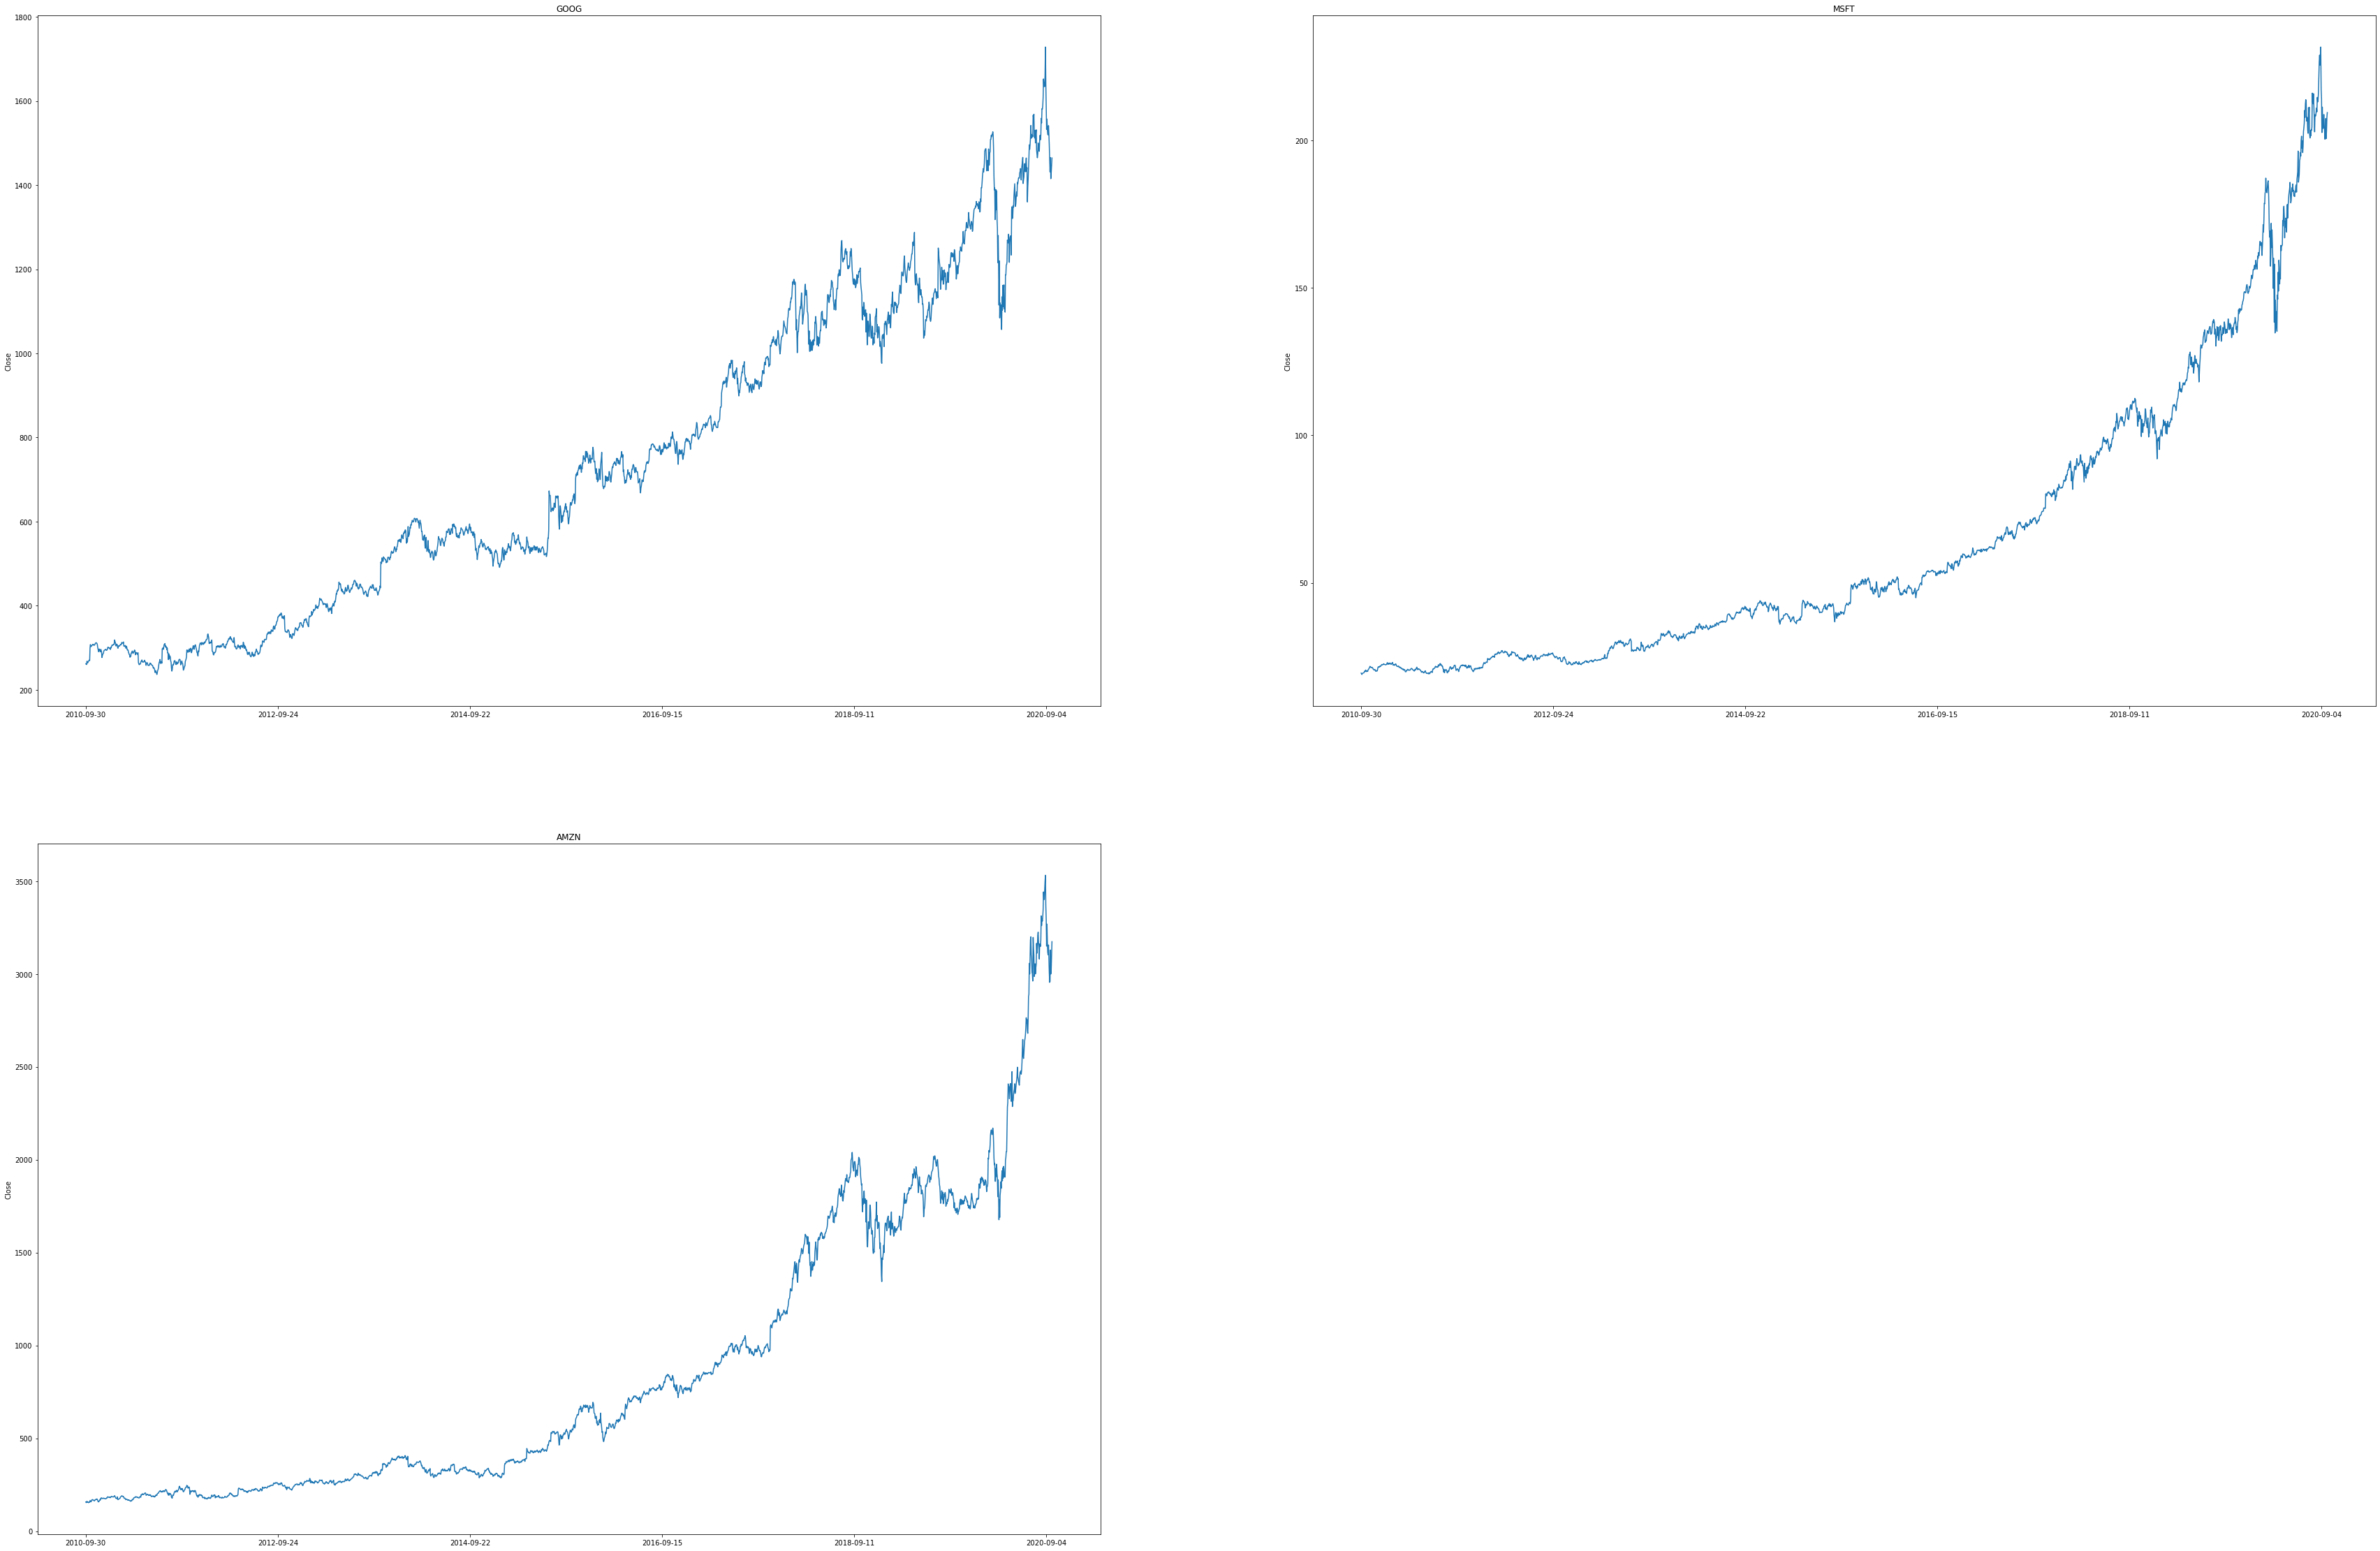

In [24]:
# Let's see a historical view of the closing price


plt.figure(figsize=(60, 40))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

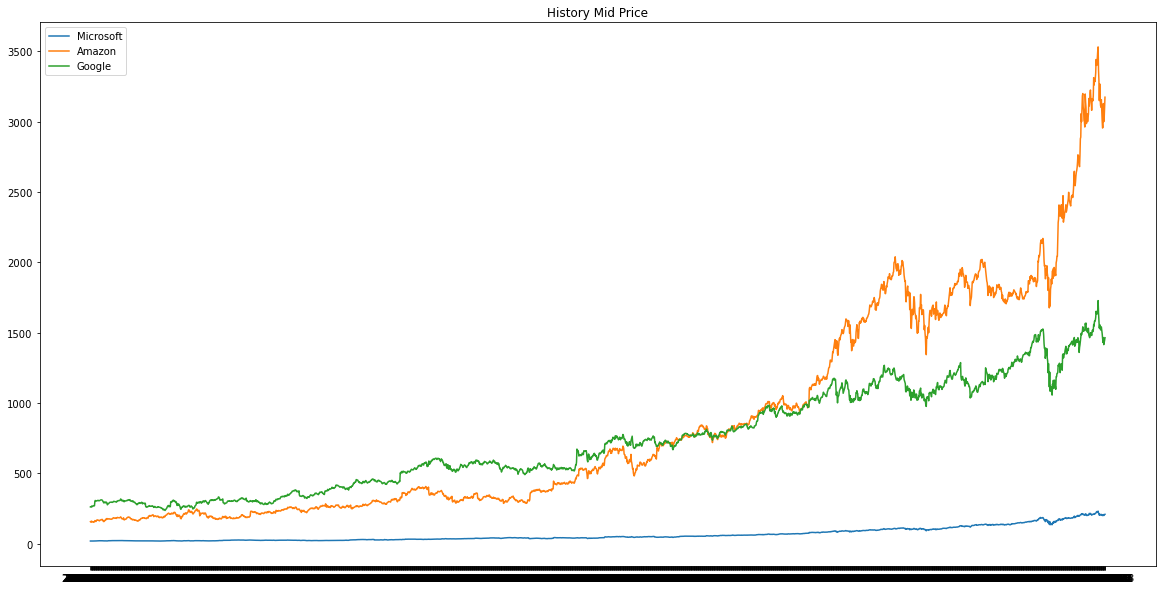

In [26]:
plt.figure(figsize = (20, 10))
plt.plot(msft['Close'], label = 'Microsoft')
plt.plot(amzn['Close'], label = 'Amazon')
plt.plot(goog['Close'], label = 'Google')
plt.title("History Close Price")
plt.legend(loc='best')
plt.show()

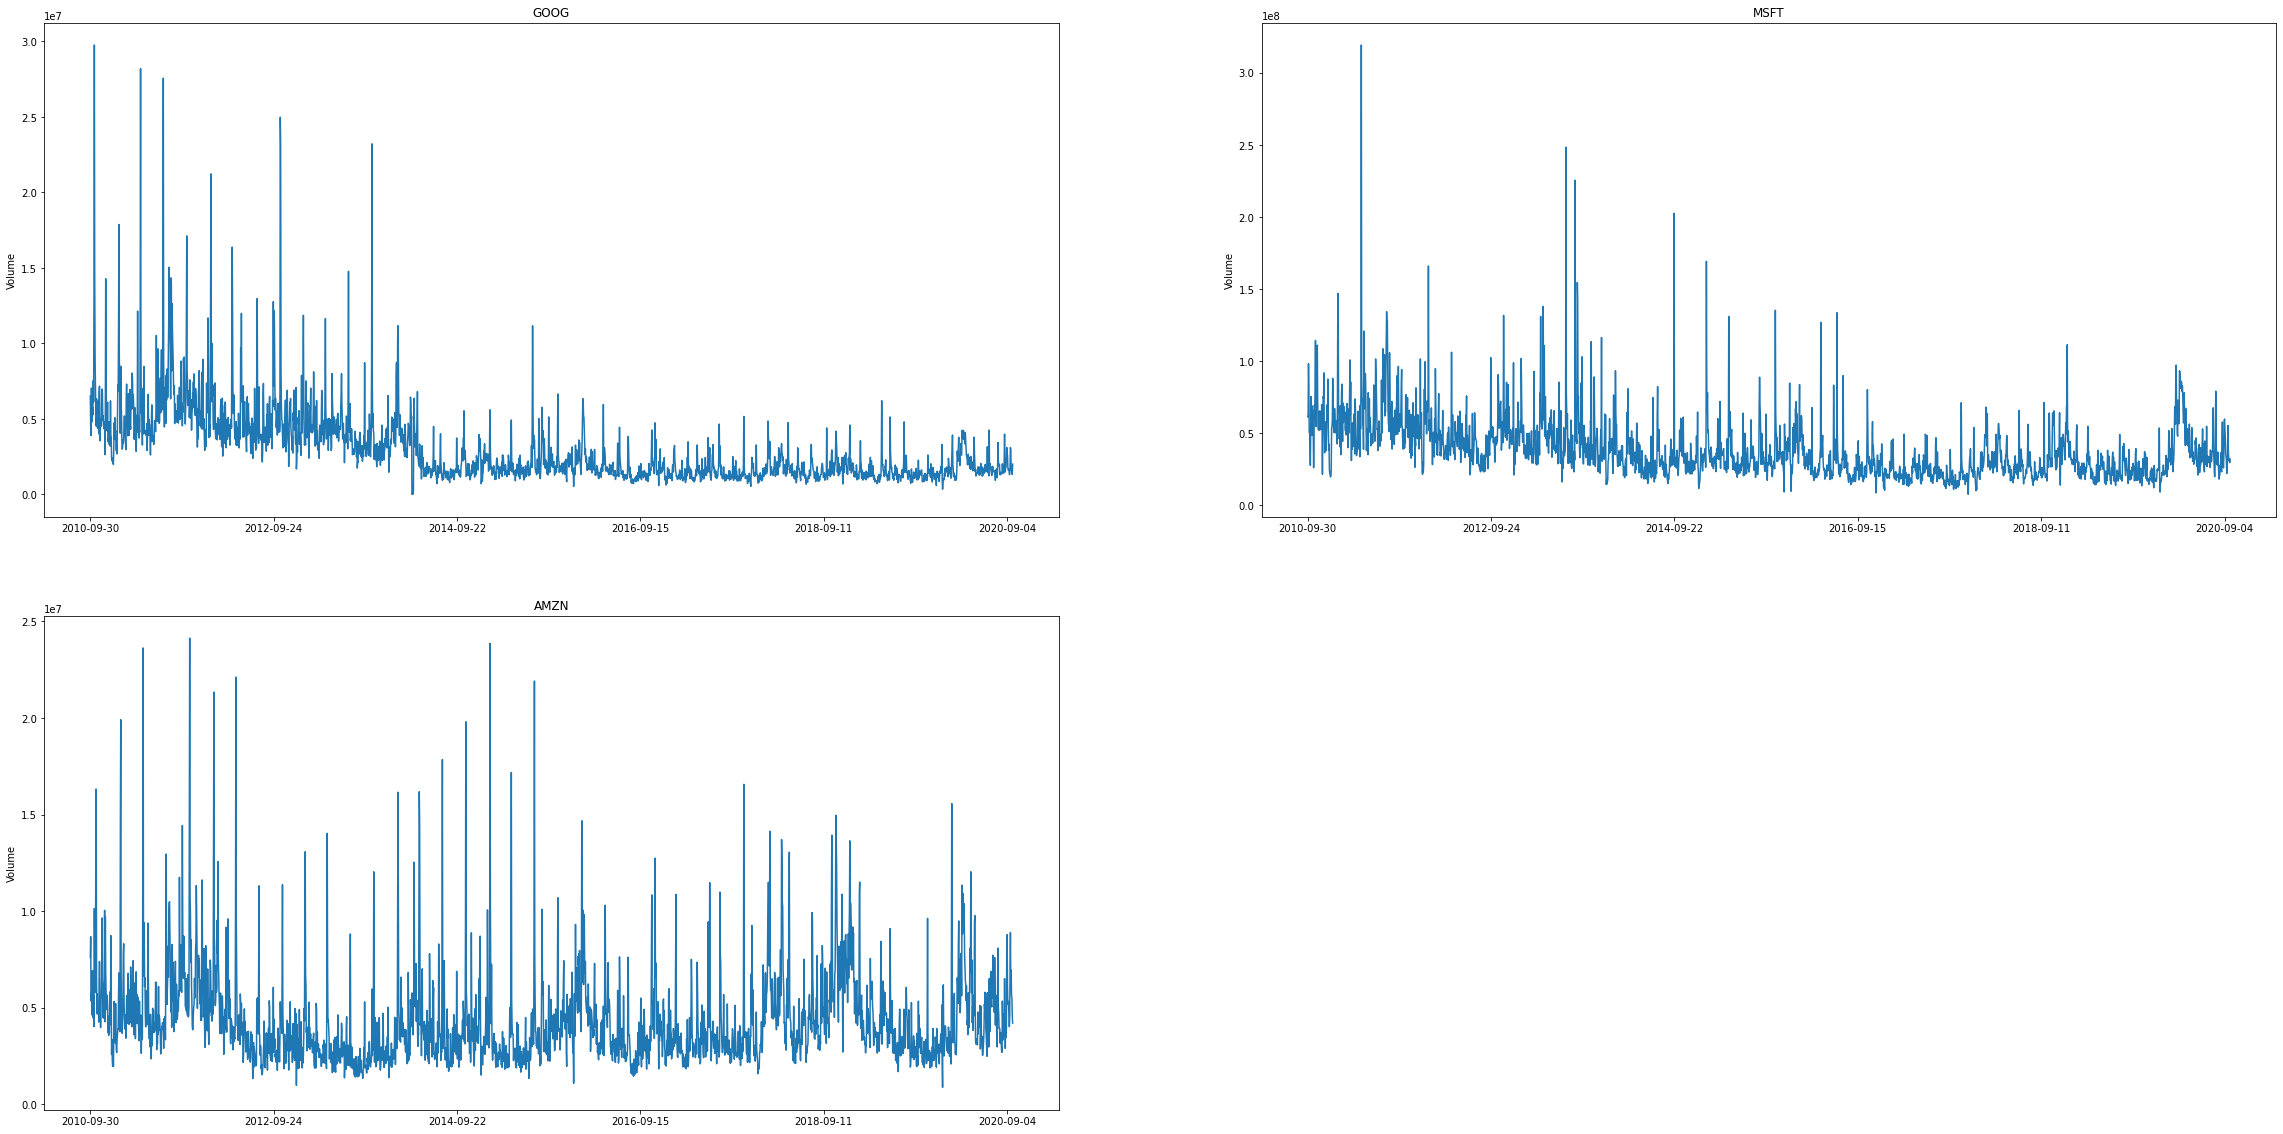

In [27]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(40, 20))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

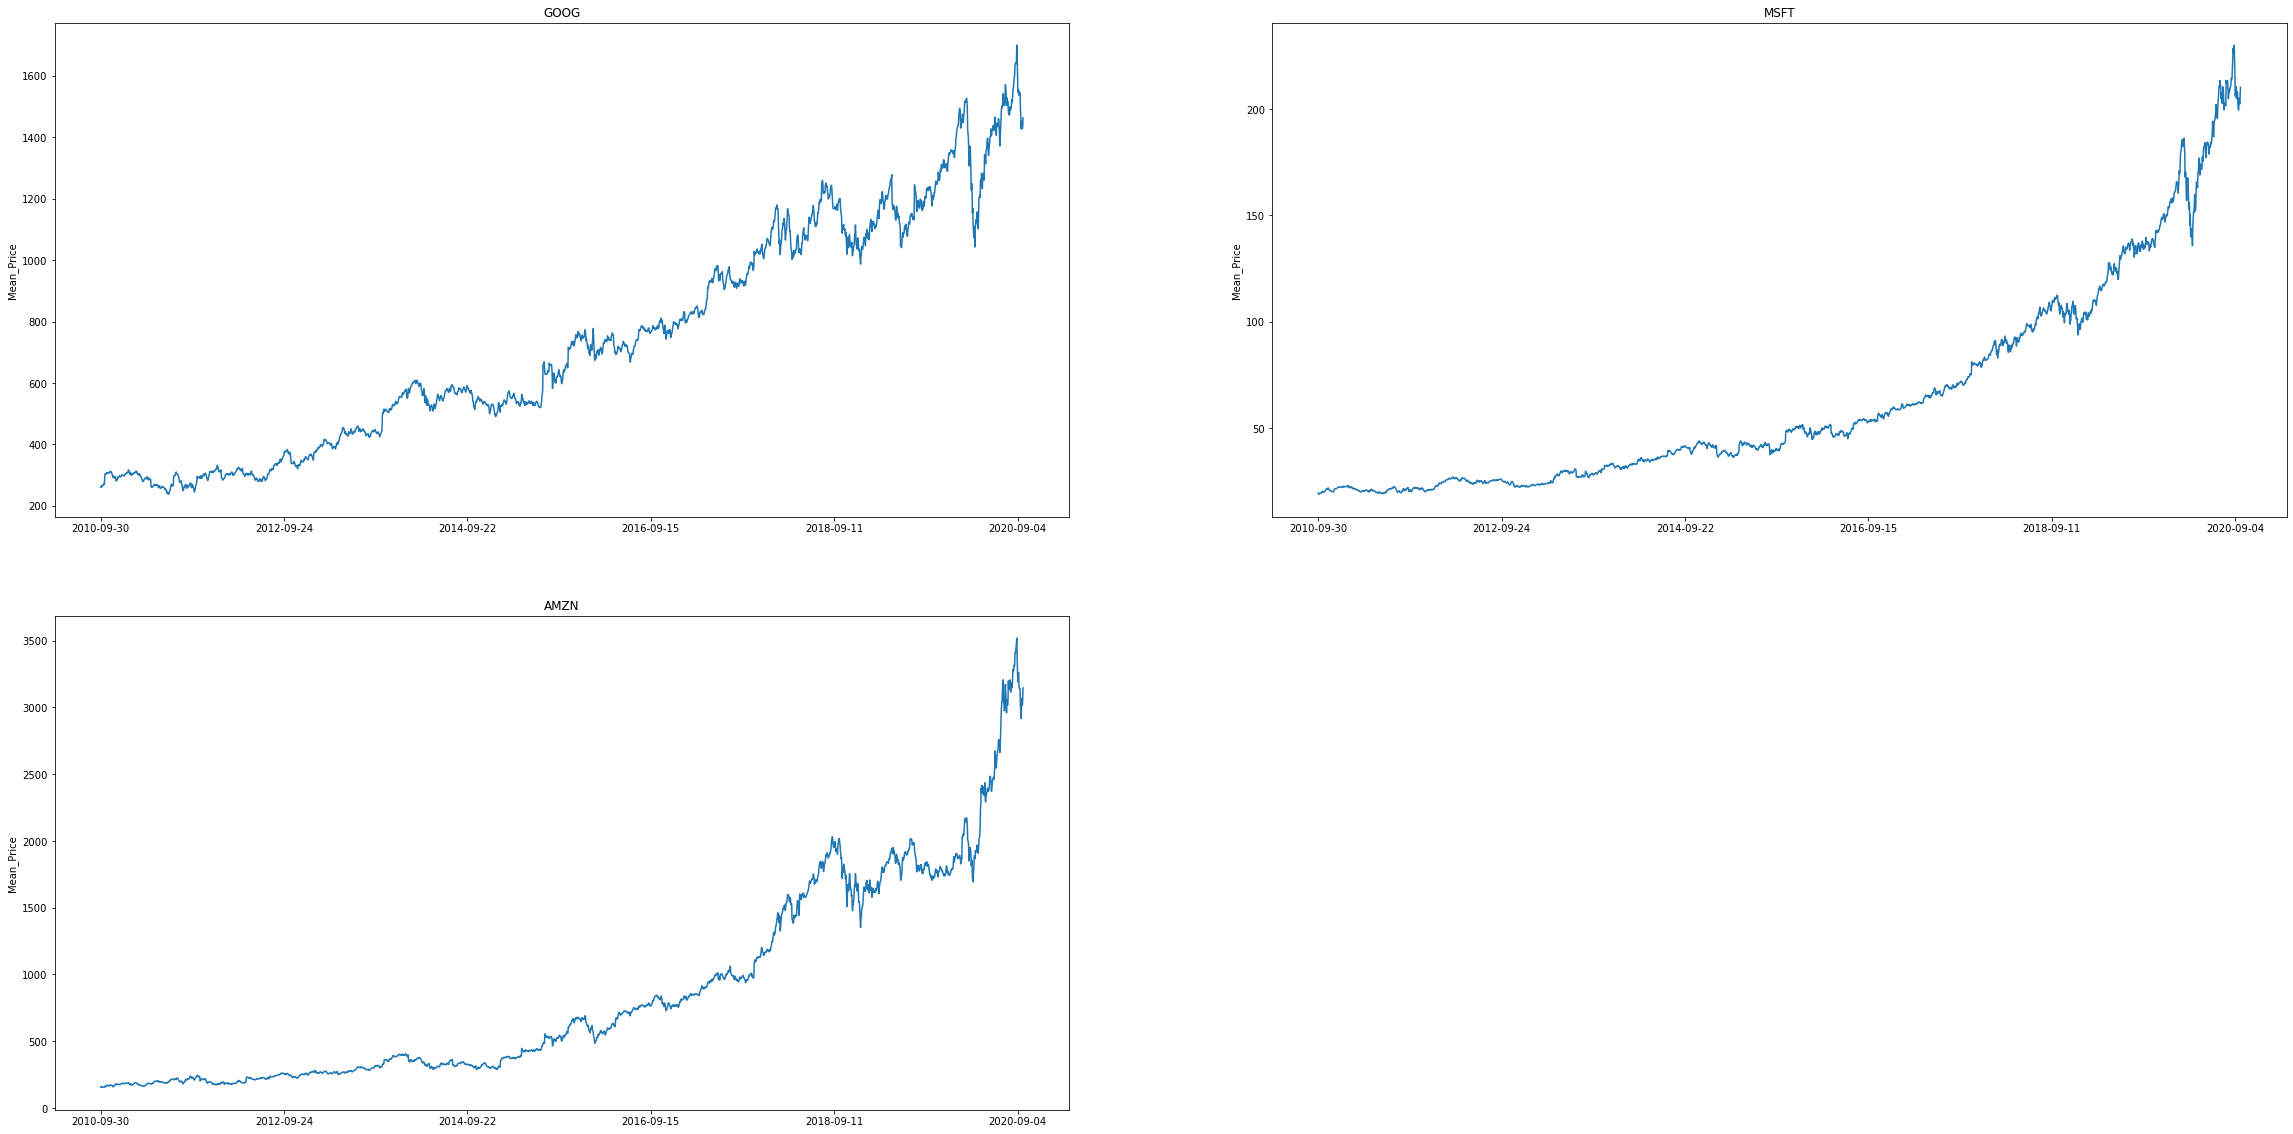

In [28]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(40, 20))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Mean_Price'].plot()
    plt.ylabel('Mean_Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

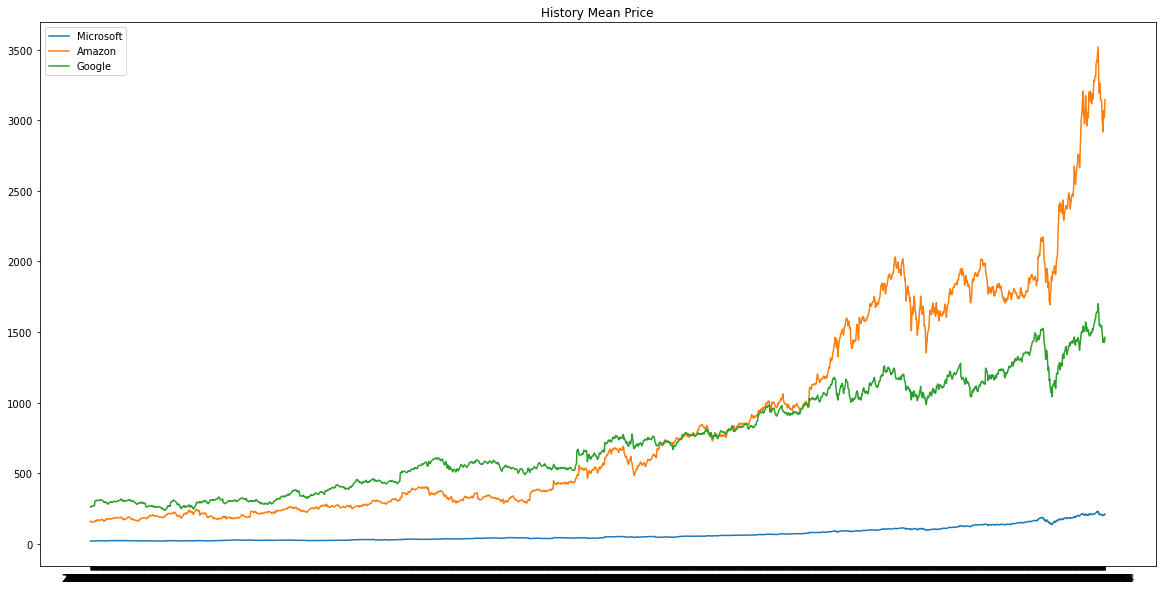

In [29]:
plt.figure(figsize = (20, 10))
plt.plot(msft['Mean_Price'], label = 'Microsoft')
plt.plot(amzn['Mean_Price'], label = 'Amazon')
plt.plot(goog['Mean_Price'], label = 'Google')
plt.title("History Mean Price")
plt.legend(loc='best')
plt.show()

In [30]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [31]:
print(goog.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Mean_Price', 'company_name', 'MA for 10 days', 'MA for 20 days',
       'MA for 50 days'],
      dtype='object')


company_name
AMAZON       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
GOOGLE       [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
MICROSOFT    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

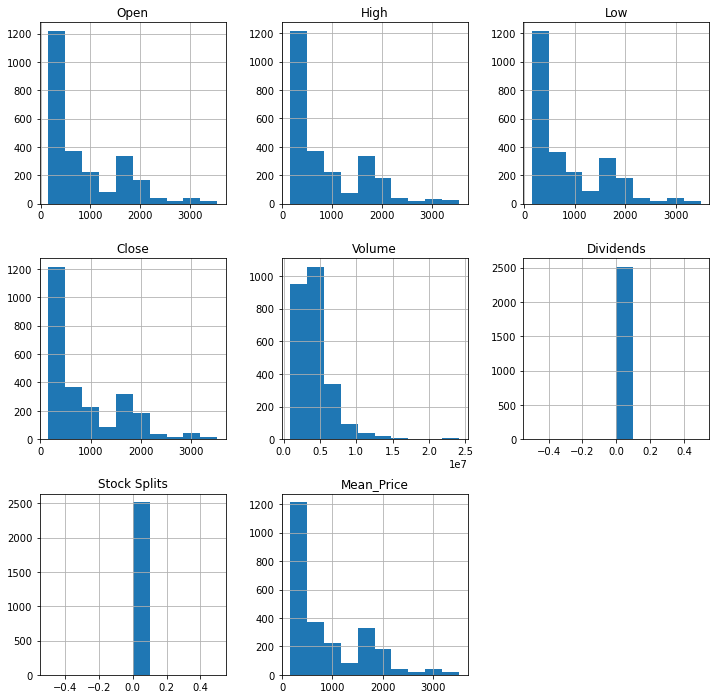

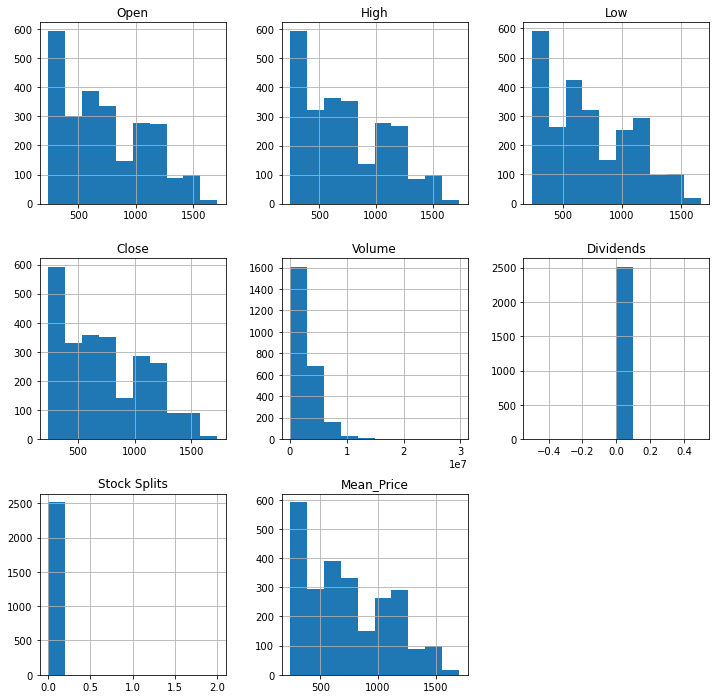

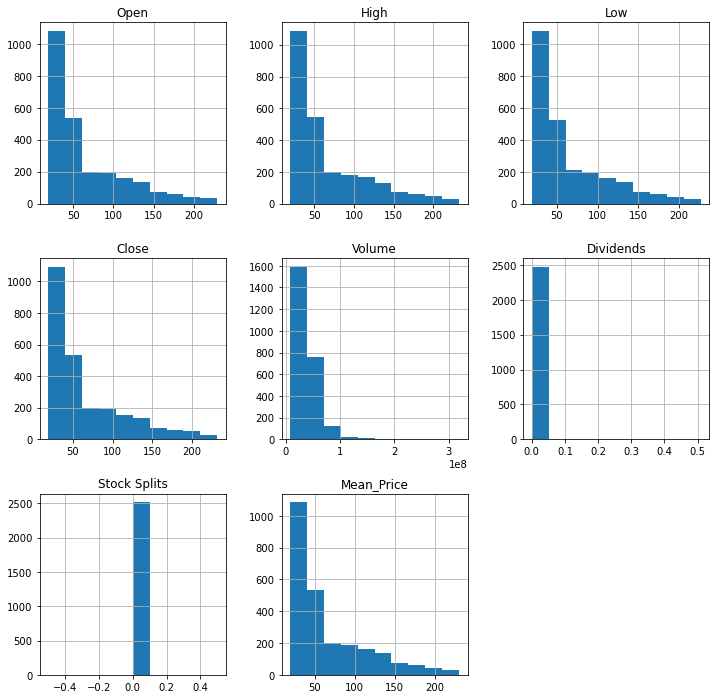

In [32]:
df.groupby("company_name").hist(figsize=(12, 12))

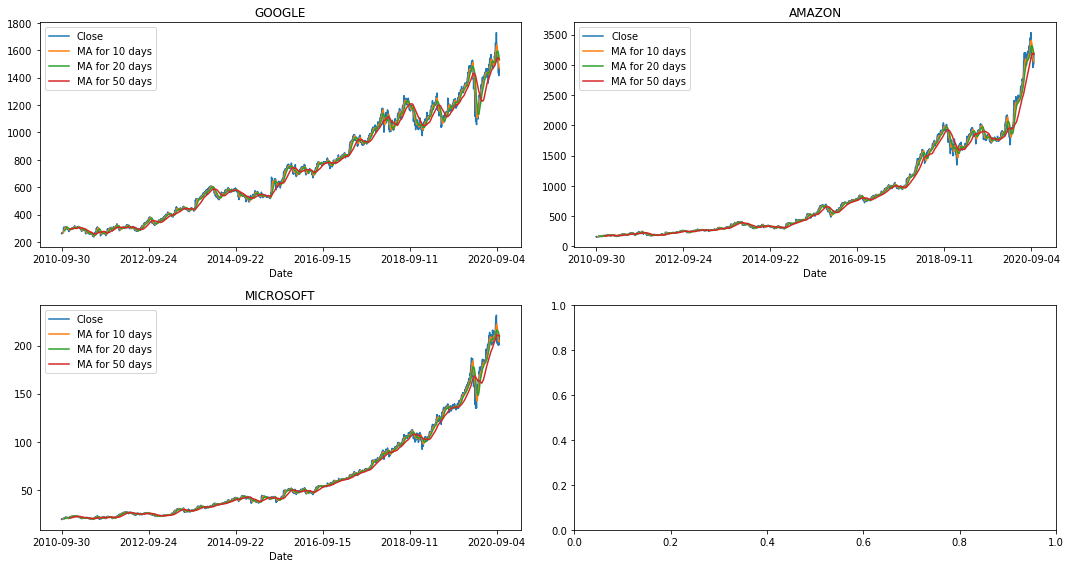

In [33]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

goog[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('GOOGLE')

msft[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

amzn[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')

fig.tight_layout()

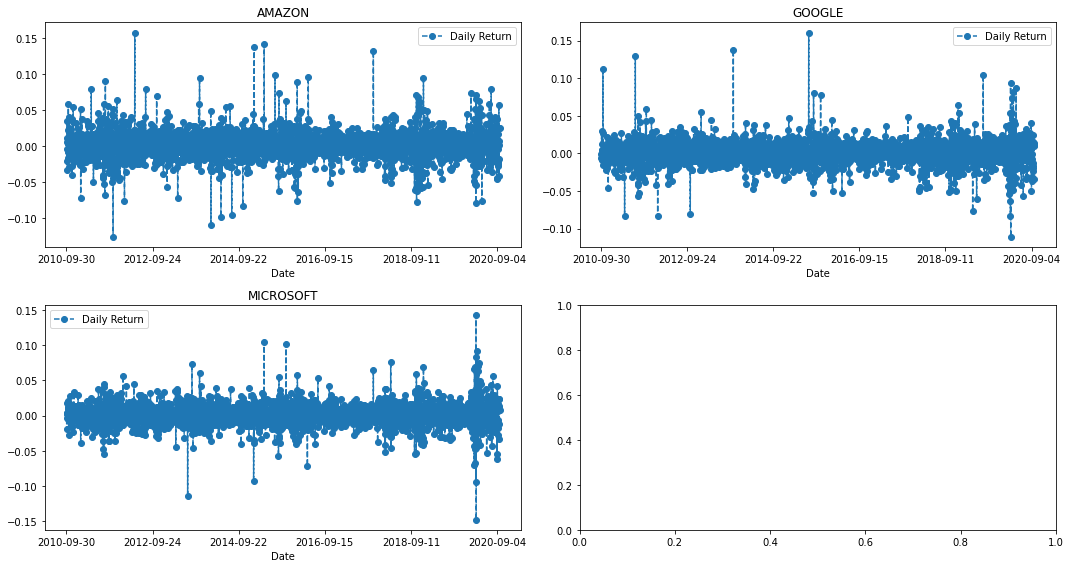

In [34]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


goog['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

msft['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

amzn['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

fig.tight_layout()

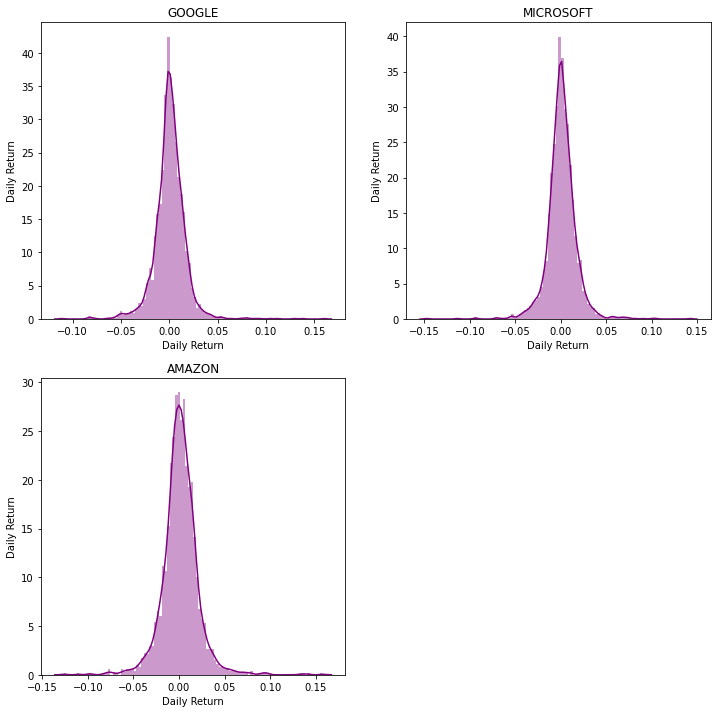

In [35]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

In [36]:
concat= amzn.merge(goog, how = 'inner', on = 'Date', left_index = True)

In [37]:
concat = concat.merge(msft, how = 'inner', on = 'Date', left_index = True)

In [38]:
concat

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Mean_Price_x,company_name_x,MA for 10 days_x,...,Close,Volume,Dividends,Stock Splits,Mean_Price,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-30,160.01,160.93,155.60,157.06,7606000,0,0,158.265,AMAZON,NaN,...,19.40,61262700,0.0,0,19.485,MICROSOFT,NaN,NaN,NaN,NaN
2010-10-01,157.08,157.44,152.20,153.71,8683400,0,0,154.820,AMAZON,NaN,...,19.32,62672300,0.0,0,19.455,MICROSOFT,NaN,NaN,NaN,-0.004124
2010-10-04,153.95,155.96,152.79,155.39,5346500,0,0,154.375,AMAZON,NaN,...,18.94,98143400,0.0,0,18.925,MICROSOFT,NaN,NaN,NaN,-0.019669
2010-10-05,157.08,161.21,157.01,160.87,5620000,0,0,159.110,AMAZON,NaN,...,19.29,78152900,0.0,0,19.155,MICROSOFT,NaN,NaN,NaN,0.018479
2010-10-06,160.60,160.68,154.60,155.40,6060800,0,0,157.640,AMAZON,NaN,...,19.36,50489700,0.0,0,19.280,MICROSOFT,NaN,NaN,NaN,0.003629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,0,0,3067.095,AMAZON,3095.024,...,207.42,33517100,0.0,0,205.090,MICROSOFT,205.319,213.2480,210.2540,0.024094
2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,0,0,3059.690,AMAZON,3068.149,...,200.59,30803800,0.0,0,204.065,MICROSOFT,204.249,212.4540,210.1088,-0.032928
2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,0,0,3017.150,AMAZON,3052.617,...,203.19,31202500,0.0,0,202.385,MICROSOFT,204.031,211.5560,210.0218,0.012962


In [40]:
mean_price = concat[['Mean_Price_x', 'Mean_Price_y', 'Mean_Price']]
mean_price

,Mean_Price_x,Mean_Price_y,Mean_Price
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280
...,...,...,...
2020-09-22,3067.095,1452.025,205.090
2020-09-23,3059.690,1434.330,204.065
2020-09-24,3017.150,1426.780,202.385


In [42]:
mean_price.rename(columns={'Mean_Price_x': 'Mean_Price Amazon', 'Mean_Price_y': 'Mean_Price Google', 'Mean_Price': 'Mean_Price Microsoft'}, inplace=True)

In [43]:
mean_price

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,158.265,261.715,19.485
2010-10-01,154.820,262.420,19.455
2010-10-04,154.375,260.800,18.925
2010-10-05,159.110,265.640,19.155
2010-10-06,157.640,266.475,19.280
...,...,...,...
2020-09-22,3067.095,1452.025,205.090
2020-09-23,3059.690,1434.330,204.065
2020-09-24,3017.150,1426.780,202.385


In [44]:
# Make a new tech returns DataFrame
tech_rets = mean_price.pct_change()
tech_rets

,Mean_Price Amazon,Mean_Price Google,Mean_Price Microsoft
Date,,,
2010-09-30,NaN,NaN,NaN
2010-10-01,-0.021767,0.002694,-0.001540
2010-10-04,-0.002874,-0.006173,-0.027242
2010-10-05,0.030672,0.018558,0.012153
2010-10-06,-0.009239,0.003143,0.006526
...,...,...,...
2020-09-22,0.051636,0.017212,0.027788
2020-09-23,-0.002414,-0.012186,-0.004998
2020-09-24,-0.013903,-0.005264,-0.008233


<AxesSubplot:>

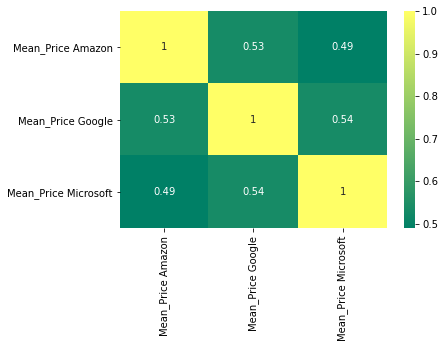

In [45]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

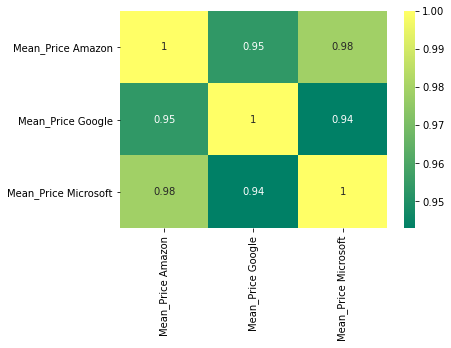

In [46]:
sns.heatmap(mean_price.corr(), annot=True, cmap='summer')